Dalam praktik penerapan teknik Computer Vision, saya menggunakan notebook Google Colab sebagai media pengolahan.
Sebagai studi kasus, saya memilih sebuah gambar yang dinilai relevan untuk dijadikan sampel praktik.
Selain itu, hasil analisis atau diagnosa dari gambar te

In [51]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


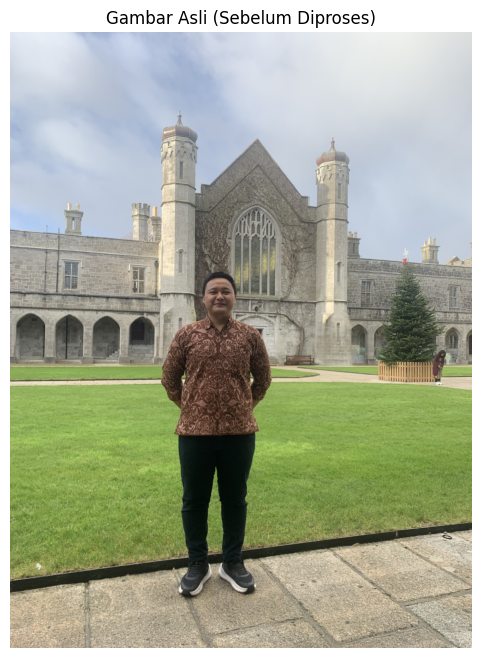

In [52]:
import cv2
import matplotlib.pyplot as plt


image_path = '/content/drive/MyDrive/Dataset/Tugas/CVImage.JPG'

#Baca File
gambar = cv2.imread(image_path)

# Ubah Format Warna karena menggunakan library OpenCV
gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

# Menampilkan Gambar Asli
plt.figure(figsize=(8, 8))
plt.imshow(gambar_rgb)
plt.title("Gambar Asli (Sebelum Diproses)")
plt.axis('off')
plt.show()

**CATATAN AWAL:**

Citra sampel merupakan sebuah foto yang diambil di luar ruangan dengan kondisi pencahayaan mendung. Analisis awal menunjukkan beberapa karakteristik yang menjadi target perbaikan citra sesuai dengan tujuan tugas:

1. **Gambar Gelap & Kontras** Rendah (Dark & Low-Contrast Image): Pencahayaan yang datar dan kurangnya sinar matahari langsung mengakibatkan citra yang terkesan pudar (keabu-abuan), sehingga citra secara keseluruhan dapat diklasifikasikan sebagai gambar dengan kontras rendah dan agak gelap pada beberapa titik.

2. **Potensi Detail Buram** (Blurred Image): Meskipun tidak buram secara signifikan, detail pada subjek (wajah dan motif batik) dan latar belakang (tekstur bangunan) dapat ditingkatkan. Dengan demikian, penerapan teknik penajaman citra relevan.



In [53]:
import cv2
import matplotlib.pyplot as plt

# 1. Tentukan path dan baca gambar
image_path = '/content/drive/MyDrive/Dataset/Tugas/CVImage.JPG'
original = cv2.imread(image_path)
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)


Menerapkan peningkatan kontras dengan metode CLAHE...
Menerapkan filter penajaman...


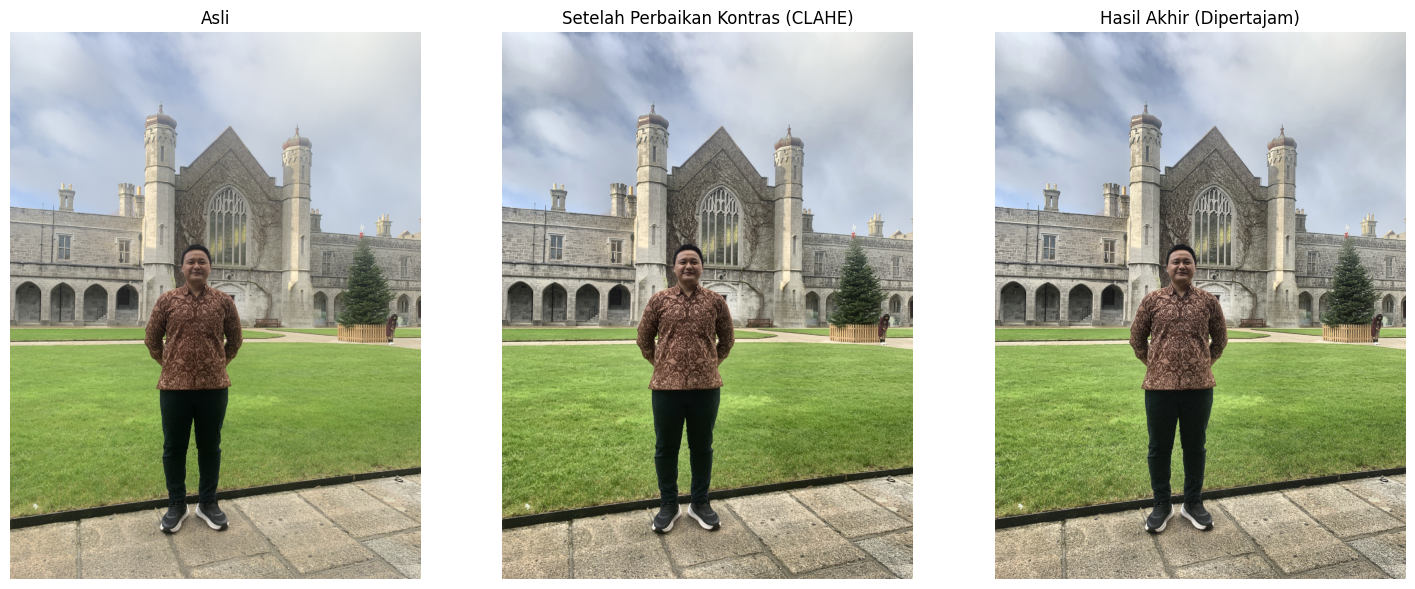

In [54]:
# Sharpening Filter
import numpy as np


#Metode CLAHE (Contrast Limited Adaptive Histogram Equalization)
#adalah teknik yang meningkatkan kontras dan kecerahan gambar secara lokal,bukan global.
#Referensi: Enhancing Medical Image Classification through Transfer Learning and CLAHE Optimization
#https://doi.org/10.2174/0115734056342623241119061744

print("Menerapkan peningkatan kontras dengan metode CLAHE...")

# Ubah ke format LAB dan terapkan CLAHE pada channel Lightness (L)
lab_image = cv2.cvtColor(gambar_rgb, cv2.COLOR_RGB2LAB)
l_channel, a_channel, b_channel = cv2.split(lab_image)

    #CLAHE ada 2 parameter Cliping Limit (CL) dan Block Size/TilenGride
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))

l_channel_clahe = clahe.apply(l_channel)
lab_image_clahe = cv2.merge([l_channel_clahe, a_channel, b_channel])
hasil_kontras_clahe = cv2.cvtColor(lab_image_clahe, cv2.COLOR_LAB2RGB)


#Penajaman (Sharpening)
print("Menerapkan filter penajaman...")

#Penajaman Gambar High
# def pertajam_gambar(image):
#     kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
#     return cv2.filter2D(image, -1, kernel)

#Penajaman Gambar Mid
def pertajam_gambar(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)


# Terapkan penajaman pada gambar yang kontrasnya sudah diperbaiki
hasil_akhir_dipertajam = pertajam_gambar(hasil_kontras_clahe)


# Tampilkan Perbandingan Hasil Akhir


plt.figure(figsize=(18, 10))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(gambar_rgb)
plt.title("Asli")
plt.axis('off')

# Hasil Kontras (dengan CLAHE)
plt.subplot(1, 3, 2)
plt.imshow(hasil_kontras_clahe)
plt.title("Setelah Perbaikan Kontras (CLAHE)")
plt.axis('off')

# Hasil Akhir (setelah dipertajam)
plt.subplot(1, 3, 3)
plt.imshow(hasil_akhir_dipertajam)
plt.title("Hasil Akhir (Dipertajam)")
plt.axis('off')

plt.show()

**Catatan Tahap 1 - Peningkatan Kontras dan Penajaman**

1. **Percobaan awal:**
Dilakukan peningkatan pencahayaan dengan penyesuaian alfa dan beta.
➝ Hasil: pencahayaan meningkat secara global, namun gambar menjadi terlalu terang sehingga detail (misalnya langit) hilang.

2. **Penerapan CLAHE**:
Untuk mengatasi masalah tersebut, digunakan metode CLAHE (Contrast Limited Adaptive Histogram Equalization) pada channel Lightness (L) di ruang warna LAB.

3. **Tuning parameter**:
Kombinasi terbaik diperoleh pada Clipping Limit (CL) = 1.0 dan Tile Grid Size (BS) = 8×8, yang meningkatkan kontras tanpa kehilangan detail penting.

3. **Penajaman gambar**:
Setelah kontras diperbaiki, diterapkan filter penajaman (mid-sharpening) untuk menonjolkan tekstur dan meningkatkan kejelasan visual. (sebelumnya diterapkan dengan kernel yang berbeda dengan lebih tajam namunmembuat gambar terlalu tajam)

**Kesimpulan:**

> Hasil akhir menunjukkan kualitas visual yang lebih seimbang, informatif, dan sesuai dengan temuan penelitian optimasi citra dengan CLAHE (Enhancing Medical Image Classification through Transfer Learning and CLAHE Optimization, 2023).




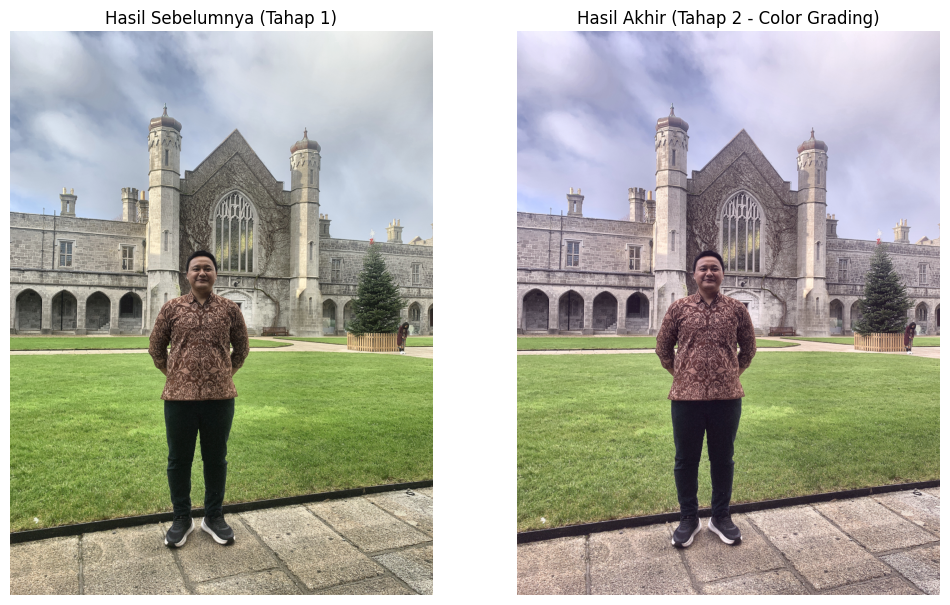

In [55]:
# Color Grading

if 'hasil_akhir_dipertajam' in locals():
    # Gambar yang akan diproses dicopy dahulu
    gambar_color_graded = hasil_akhir_dipertajam.copy()

    #Split Toning (Mencoba memberikan efek untuk tone gambar)
    # Menambahkan sedikit warna kuning/oranye ke channel Merah & Hijau (Highlights memberikan kesan warm)
    # dan sedikit warna biru ke channel Biru (Shadows)

    # Pisahkan channel warna
    r, g, b = cv2.split(gambar_color_graded)

    # Tambahkan rona oranye pada area terang dengan meningkatkan channel Merah sedikit
    r = cv2.add(r, 10)

    # Tambahkan rona teal/biru pada area gelap dengan meningkatkan channel Biru sedikit
    b = cv2.add(b, 15)

    # Gabungkan kembali channel warna
    hasil_color_graded = cv2.merge([r, g, b])

    # Perbandingan hasil tahap 1 dan tahap 2
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(hasil_akhir_dipertajam)
    plt.title("Hasil Sebelumnya (Tahap 1)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(hasil_color_graded)
    plt.title("Hasil Akhir (Tahap 2 - Color Grading)")
    plt.axis('off')

    plt.show()

**Tahap 2 – Color Grading**

Tujuan: Menambah estetika visual melalui penyesuaian warna.

**Metode:**

*   Split toning pada channel R, G, B.

*   Merah ditingkatkan (+10) → memberi efek hangat.
*   Biru ditingkatkan (+15) → memberi efek dingin.

**Kesimpulan:**
> Memberi karakter visual lebih hidup dan artistik. Meski tetap tidak bagus tampilannya :V



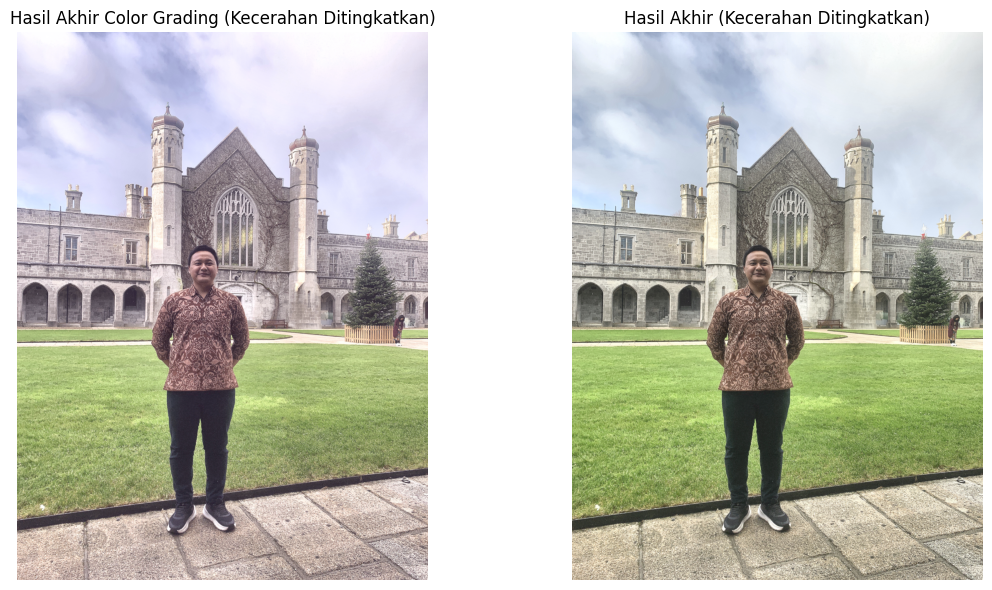

In [66]:
# Menaikkan kecerahan gambar secara global
gambar_lebih_cerah = cv2.convertScaleAbs(hasil_color_graded, alpha=1.0, beta=20)
gambar_lebih_cerah2 = cv2.convertScaleAbs(hasil_akhir_dipertajam, alpha=1.0, beta=20)


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(gambar_lebih_cerah)
axs[0].set_title("Hasil Akhir Color Grading (Kecerahan Ditingkatkan)")
axs[0].axis('off')

axs[1].imshow(gambar_lebih_cerah2)
axs[1].set_title("Hasil Akhir (Kecerahan Ditingkatkan)")
axs[1].axis('off')

plt.tight_layout()
plt.show()


**Tahap 3 – Penyesuaian Kecerahan**

Tujuan: Mengevaluasi peningkatan kecerahan pada gambar baik sebelum maupun setelag color grading

**Metode:**



*   Menaikkan beta = +20 secara global dengan cv2.convertScaleAbs().
*   Diterapkan pada dua versi: hasil color grading dan hasil akhir yang telah dipertajam.





**Hasil:**



*   Gambar lebih cerah, detail lebih mudah diamati.
*   Perbandingan menunjukkan bahwa gambar sudah lebih bagus dari gambar oroginal, color grading bersifat preferensi.

**Kesimpulan:**

> Peningkatan kecerahan global layal digunakan juga, tergantung kasus, color grading sendiri sifatnya pereferensi

